## Mask R-CNN - Inspect Trained Model

Code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [2]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Path to Shapes trained weights
SHAPES_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_shapes.h5")

True

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE    

NameError: name 'gt_class_id' is not defined

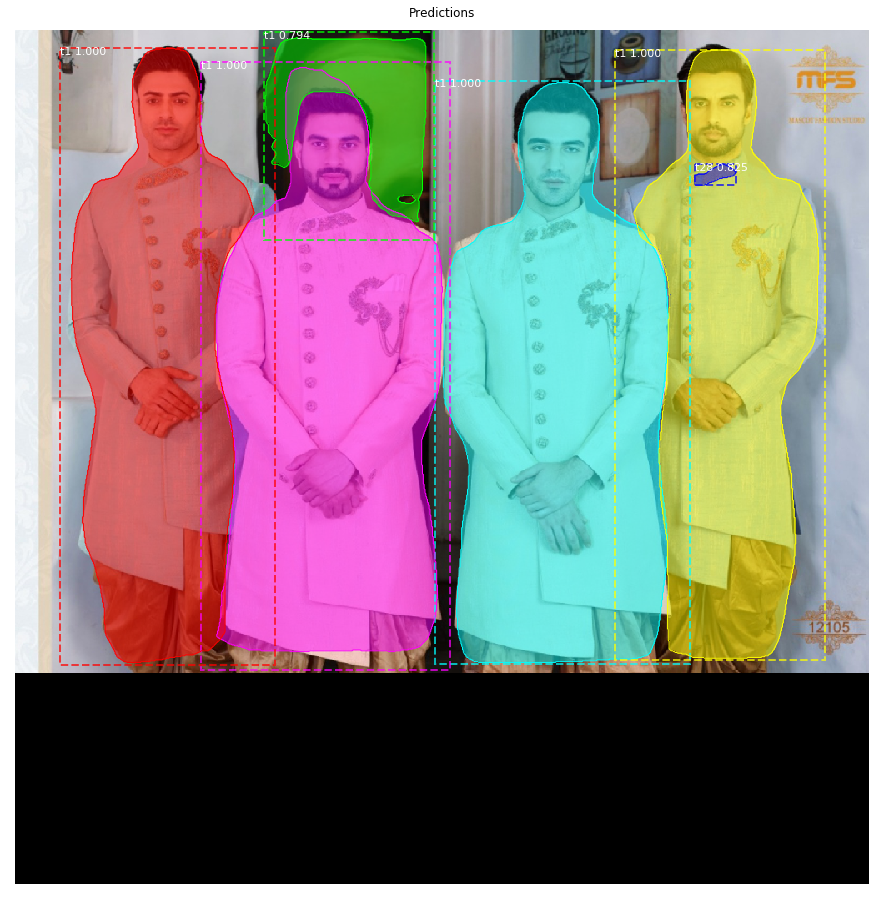

In [8]:
# Run one of the code blocks

# Shapes toy dataset
# import shapes
# config = shapes.ShapesConfig()

# MS COCO Dataset

print(tf.executing_eagerly())
import coco

class InferenceConfig(coco.CocoConfig):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

COCO_DIR = "../../datasets/coco"  # TODO: enter value here

TEST_MODE = "inference"

def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax
print(tf.executing_eagerly())
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
print(tf.executing_eagerly())
model.load_weights(COCO_MODEL_PATH, by_name=True)
print(tf.executing_eagerly())

results = model.detect([img_data.numpy()], verbose=1)
print(tf.executing_eagerly())

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(img_data.numpy(), r['rois'], r['masks'], r['class_ids'], 
                            ['t'+str(i) for i in range(81)], r['scores'], ax=ax,
                            title="Predictions")
print(r)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

In [6]:
with open("dress.jpeg", "rb") as f:
    data = f.read()
    
from PIL import Image
import io

def image_to_arr(images, width, height):
    image_data = []
    factors = []
    for image in images:
        im_size = image.size
        factor = max(im_size[0] / width, im_size[1] / height)
        image = image.resize((int(im_size[0] / factor), int(im_size[1] / factor)), Image.NEAREST)
        im_size = image.size
        data = [tuple(pixel) for pixel in image.getdata()]

        data = tf.reshape(tf.constant(data, dtype=tf.uint8), (im_size[1], im_size[0], 3))
        data = tf.pad(data, [
            [0, height - data.shape[0]],
            [0, width - data.shape[1]],
            [0, 0]], 'CONSTANT')
        image_data.append(data)
        factors.append(factor)
    return image_data, factors

img = Image.open(io.BytesIO(data))
img_data = image_to_arr([img], 1024, 1024)[0][0]

In [ ]:
results = model.detect([img_data.numpy()], verbose=1)


In [ ]:
import tensorflow as tf

tf.executing_eagerly()

In [11]:
mask = r['masks'][0]
done = tf.zeros_like(mask)
outline = []

for r in mask:
    for c in mask[r]:
        if c:
            if not done[]

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       ...,
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])